# Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("C:/Users/kisho/Datasets/Copper_Set.csv")

In [10]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [11]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

## Changing dtypes

In [12]:
df['item_date'] = pd.to_datetime(df['item_date'],format = '%Y%m%d',errors = 'coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'],format = '%Y%m%d',errors = 'coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors='coerce')

In [13]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [14]:
df.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

## Null values

In [15]:
df.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [16]:
df['material_ref'].fillna('unknown',inplace=True)
df.dropna(inplace=True)

In [18]:
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if x.startswith('00000') else x)

In [19]:
df.isna().sum()

id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref     22726
product_ref          0
delivery date        0
selling_price        0
dtype: int64

In [20]:
df['material_ref'].fillna('unknown',inplace=True)
df.dropna(inplace=True)

# Removing Invalid numbers

In [11]:
x =['quantity tons','application','thickness','width','selling_price']
for col in x:
    a = df[col]<=0
    df.loc[a,col] = np.nan

In [12]:
df.isna().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [13]:
df.dropna(inplace=True)

## plotting

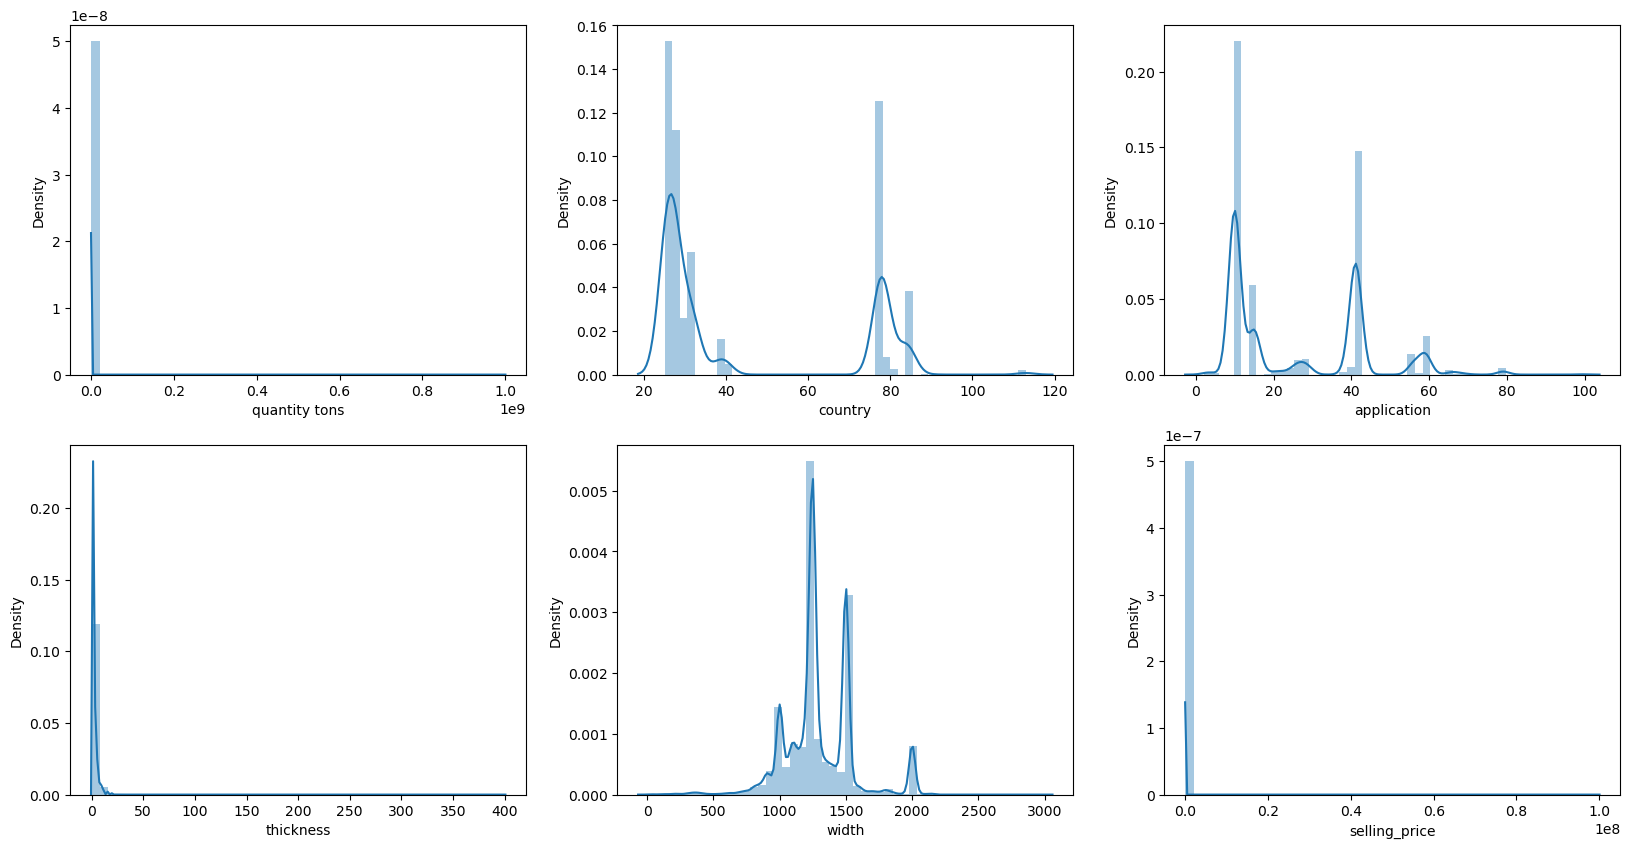

In [14]:
x =['quantity tons','country','application','thickness','width','selling_price']
plt.figure(figsize=(20,10))
for i,feature in enumerate(x):
    plt.subplot(2,3,i+1)
    sns.distplot(df[feature])

# Log Transformation

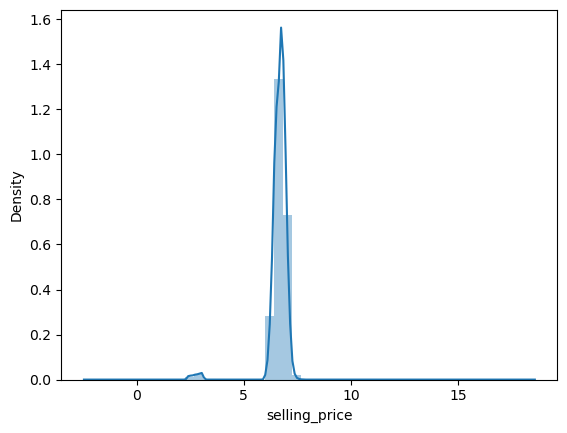

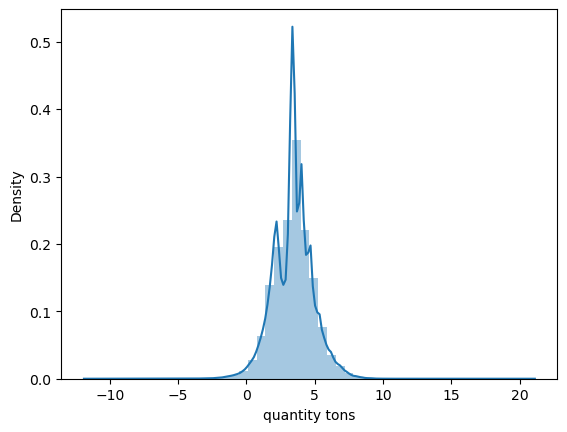

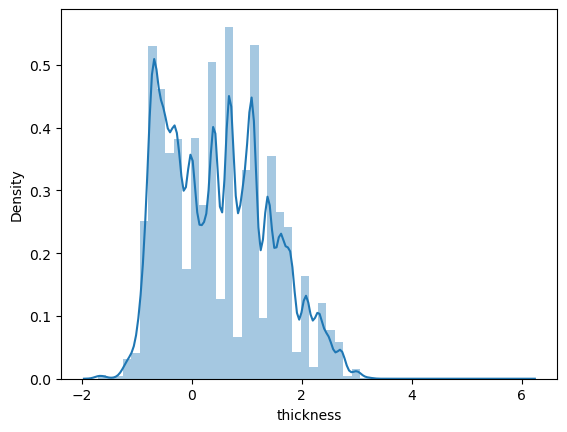

In [15]:
data = df.copy()

data['selling_price'] = np.log(data['selling_price'])
sns.distplot(data['selling_price'])
plt.show()

data['quantity tons'] = np.log(data['quantity tons'])
sns.distplot(data['quantity tons'])
plt.show()

data['thickness'] = np.log(data['thickness'])
sns.distplot(data['thickness'])
plt.show()

In [16]:
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,104991,1668701718,2021-04-01,6.953684


<Axes: >

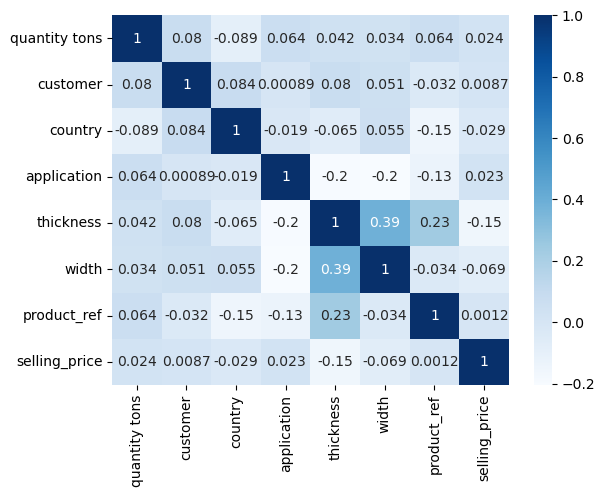

In [17]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

# Regression

In [19]:
x = data[['quantity tons','customer','country','application','thickness','width','product_ref']]
y = data['selling_price']

In [20]:
ohe1 = OneHotEncoder()
item_type = ohe1.fit_transform(data[['item type']]).toarray()
ohe2 = OneHotEncoder()
status = ohe2.fit_transform(data[['status']]).toarray()

In [21]:
x = np.concatenate((x.values,item_type,status),axis=1)

In [22]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
r2_score(y_test,y_pred)

0.933350398894038

# Testing New sample

In [30]:
# ['quantity tons','customer','country','application','thickness','width','product_ref','item_type','status']
# convert quantity tons and thickness to log

new_sample = np.array([[np.log(100),9431,23,43,np.log(99),43,5342,'W','Won']])
new_ohe1 = ohe1.transform(new_sample[:,[7]]).toarray()
new_ohe2 = ohe2.transform(new_sample[:,[8]]).toarray()
x = np.concatenate([new_sample[:,:7],new_ohe1,new_ohe2],axis=1)
final = scaler.transform(x)
prediction = rfr.predict(final)

In [31]:
print('Price:',np.exp(prediction)[0])

Price: 907.0288661485691


# Creating pickle files

In [32]:
import pickle

with open('copper_rfr.pkl','wb') as f:
    pickle.dump(rfr,f)
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
with open('ohe1.pkl','wb') as f:
    pickle.dump(ohe1,f)
with open('ohe2.pkl','wb') as f:
    pickle.dump(ohe2,f)

# Classification

In [23]:
data1 = data.copy()

In [24]:
data1.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,104991,1668701718,2021-04-01,6.953684


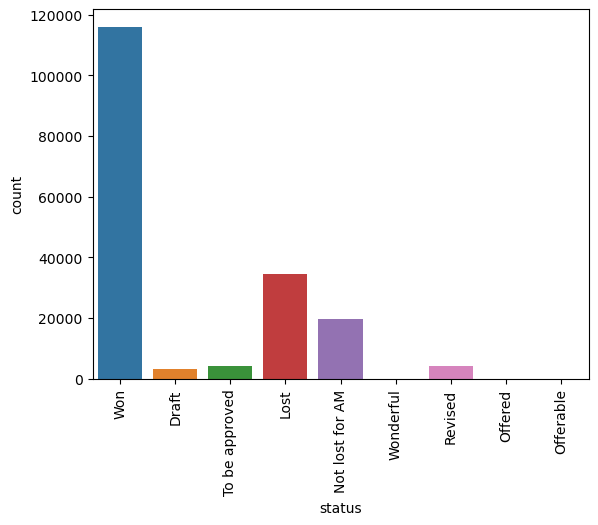

In [25]:
sns.countplot(data=data1, x='status')
plt.xticks(rotation=90)
plt.show()

In [26]:
data1['status'] = data1['status'].apply(lambda x: 'Won' if x in ['Won','To be approved','offered','offerable'] else 'Lost')

<Axes: xlabel='status', ylabel='count'>

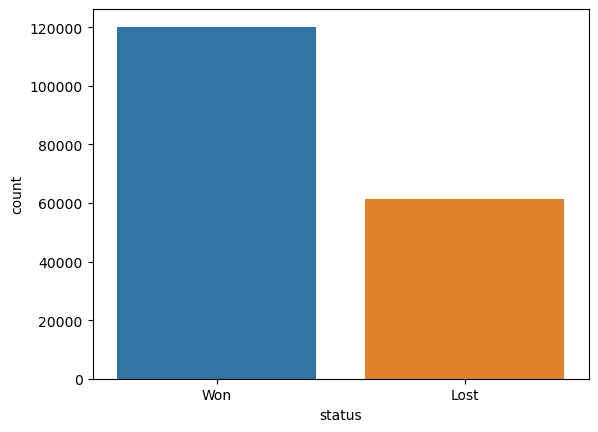

In [27]:
sns.countplot(data=data1,x='status')

In [28]:
data1.shape

(181620, 14)

In [29]:
data1.status.value_counts()

Won     120163
Lost     61457
Name: status, dtype: int64

In [30]:
x = data1[['quantity tons','customer','country','application','thickness','width','product_ref','selling_price']]
y = data1['status']

In [31]:
ohe3 = OneHotEncoder()
item_type = ohe3.fit_transform(data[['item type']]).toarray()
x = np.concatenate([x.values,item_type],axis=1)

In [32]:
le = LabelEncoder()
y = le.fit_transform(data1[['status']])
y

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
scaler1 = StandardScaler()
x = scaler1.fit_transform(x)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [51]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     18401
           1       0.92      0.92      0.92     36085

    accuracy                           0.89     54486
   macro avg       0.88      0.88      0.88     54486
weighted avg       0.89      0.89      0.89     54486

0.8933303967991778
[[15403  2998]
 [ 2814 33271]]


# Testing New Point

In [53]:
# ['quantity tons','customer','country','application','thickness','width','product_ref','selling_price']

new = np.array([[np.log(100),9431,23,43,np.log(99),43,5342,np.log(10000),'W']])
a = ohe3.transform(new[:,[8]]).toarray()
new = np.concatenate([new[:,:8],a],axis=1)
x = scaler1.transform(new)
out = rfc.predict(x)

In [55]:
status = le.inverse_transform(out)
status

array(['Won'], dtype=object)

# Creating Pickle Files

In [56]:
import pickle

with open('copper_rfc.pkl','wb') as f:
    pickle.dump(rfc,f)
with open('ohe3.pkl','wb') as f:
    pickle.dump(ohe3,f)
with open('le.pkl','wb') as f:
    pickle.dump(le,f)
with open('scaler1.pkl','wb') as f:
    pickle.dump(scaler1,f)

In [ ]:
dt = DecisionTreeRegressor()
parameters = {'max_depth':[2,5,10,20],
              'min_samples_split':[2,5,8,10],
              'min_samples_leaf':[1,2,4,6],
              'max_features':['auto','sqrt','log2']}
grid = GridSearchCV(estimator=dt, param_grid =parameters,cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
r2_score(y_test,y_pred)